In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from pylab import *

import seaborn as sns

/databricks/python/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
 from numpy.core.umath_tests import inner1d
/databricks/python/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
 "This module will be removed in 0.20.", DeprecationWarning)

# Linear Regression

### staright line : y = mx + b

In [4]:
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

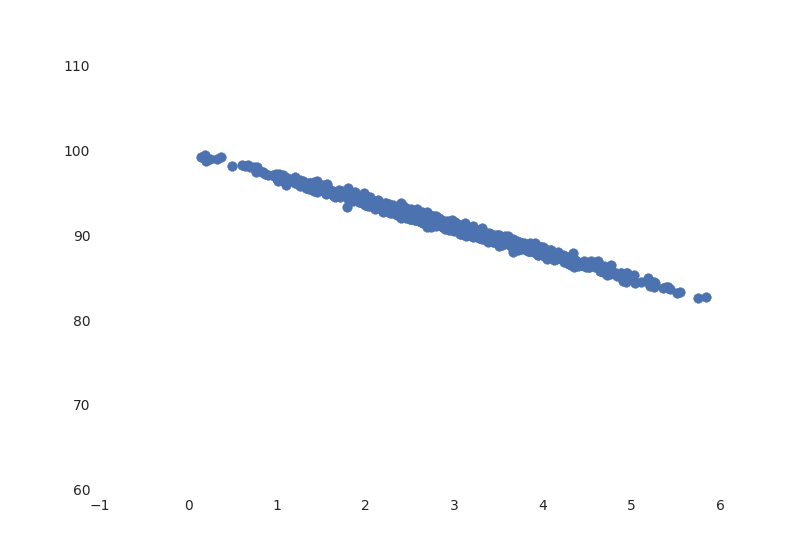

In [5]:
plt.figure(figsize=(2,2))

fig, ax = plt.subplots()
ax.plot(1,2,1)

ax.scatter(pageSpeeds , purchaseAmount)
ax.set_xlim(-1, 6)
ax.set_ylim(60, 110)

display(fig)

In [6]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)
print("slope" , slope)
print("intercept", intercept)
print("r_value" , r_value) # measure quality of that fit
print("p_value" , p_value) # two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero.
print("std_err" , std_err)

slope -2.9934715107803793
intercept 99.99415456866092
r_value -0.9950374399896219
p_value 0.0
std_err 0.009475428251006078

In [7]:
# did we grab all variance on both side of the line? how much we do capture the variance?
# r-squared = 0 ==> didnt capture most of variances
# r-squared = 1 ==> captured most of variances

print("r-quared =" , r_value**2)


r-quared = 0.9900995069811004

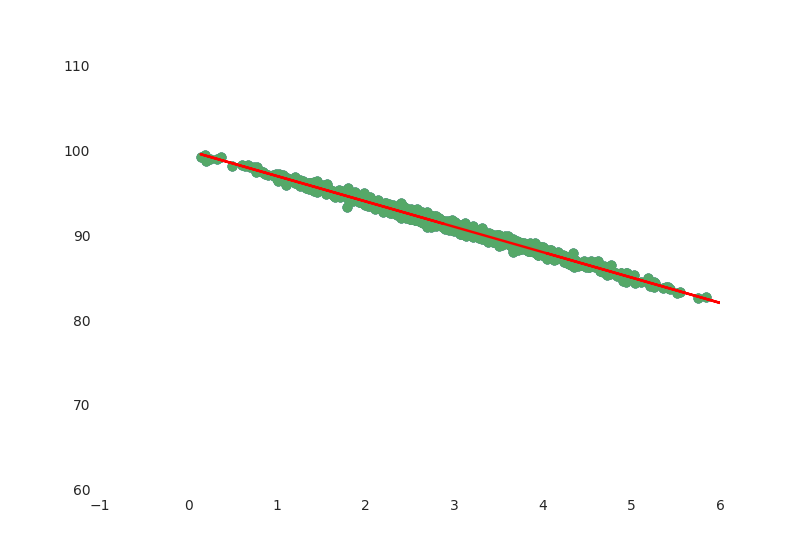

In [8]:
def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

ax.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
display(fig)

# Polynomial Regression

### curve line : secod order polynomial , third order polynomial, ...

In [11]:
# when the relationships are not linear 
# careful of overfitting
# increasing the order can increase the overfitting 
# higher r_squared means the curve fitting the train data very well

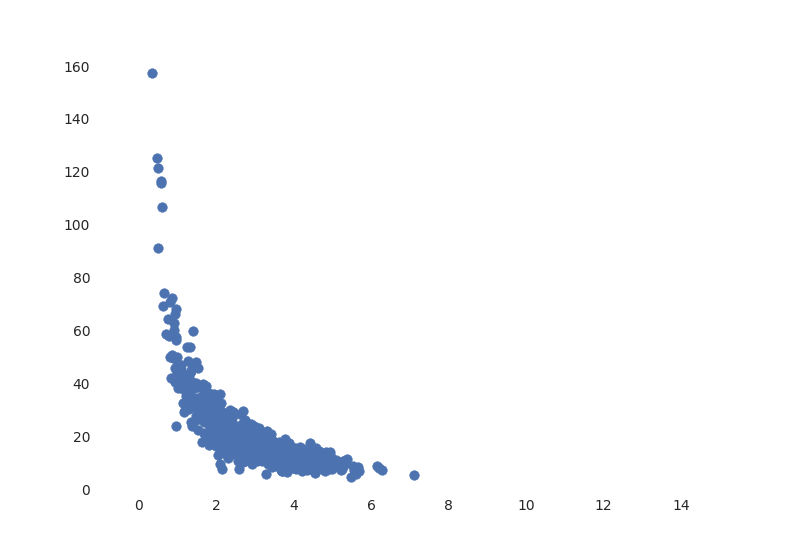

In [12]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds



# fig.clf() # clean the figure
plt.figure(figsize=(2,2))
fig, ax = plt.subplots()
ax.plot(1,2,1)
ax.scatter(pageSpeeds , purchaseAmount)
ax.set_xlim(-1, 15)
ax.set_ylim(0, 160)

display(fig)

#### np.poly1d([1,2,3]) returns an object that represents=  X^2+2X+3

In [14]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

vector_of_coefficient = np.polyfit(x, y, 4) # Returns a vector of coefficients p that minimises the squared error in the order
polinomial_model_4 = np.poly1d(vector_of_coefficient) # construct an polynomial model of our data that minimizes squared error.

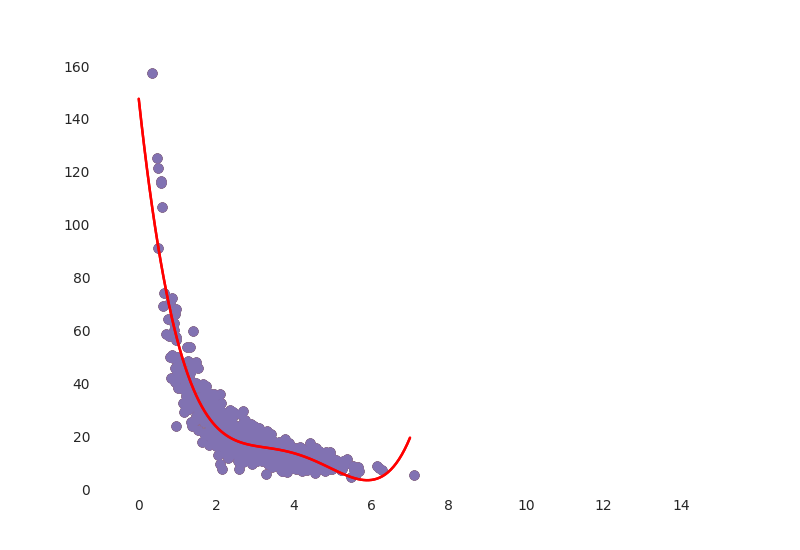

In [15]:
xp = np.linspace(0, 7, 100) # Return evenly spaced numbers over a specified interval.
ax.scatter(x, y)
ax.plot(xp, polinomial_model_4(xp), c='r')

display(fig)

In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y, polinomial_model_4(x))

print(r2)

0.8293766396303073

In [17]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


X, y = load_iris(return_X_y=True)



# clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
# clf.predict(X[:2, :])


# array([0, 0])
# clf.predict_proba(X[:2, :]) 
# array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
#        [9.7...e-01, 2.8...e-02, ...e-08]])
# clf.score(X, y)

In [18]:
X

Out[ 55 ]: 
array([[5.1, 3.5, 1.4, 0.2],
 [4.9, 3. , 1.4, 0.2],
 [4.7, 3.2, 1.3, 0.2],
 [4.6, 3.1, 1.5, 0.2],
 [5. , 3.6, 1.4, 0.2],
 [5.4, 3.9, 1.7, 0.4],
 [4.6, 3.4, 1.4, 0.3],
 [5. , 3.4, 1.5, 0.2],
 [4.4, 2.9, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.1],
 [5.4, 3.7, 1.5, 0.2],
 [4.8, 3.4, 1.6, 0.2],
 [4.8, 3. , 1.4, 0.1],
 [4.3, 3. , 1.1, 0.1],
 [5.8, 4. , 1.2, 0.2],
 [5.7, 4.4, 1.5, 0.4],
 [5.4, 3.9, 1.3, 0.4],
 [5.1, 3.5, 1.4, 0.3],
 [5.7, 3.8, 1.7, 0.3],
 [5.1, 3.8, 1.5, 0.3],
 [5.4, 3.4, 1.7, 0.2],
 [5.1, 3.7, 1.5, 0.4],
 [4.6, 3.6, 1. , 0.2],
 [5.1, 3.3, 1.7, 0.5],
 [4.8, 3.4, 1.9, 0.2],
 [5. , 3. , 1.6, 0.2],
 [5. , 3.4, 1.6, 0.4],
 [5.2, 3.5, 1.5, 0.2],
 [5.2, 3.4, 1.4, 0.2],
 [4.7, 3.2, 1.6, 0.2],
 [4.8, 3.1, 1.6, 0.2],
 [5.4, 3.4, 1.5, 0.4],
 [5.2, 4.1, 1.5, 0.1],
 [5.5, 4.2, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.1],
 [5. , 3.2, 1.2, 0.2],
 [5.5, 3.5, 1.3, 0.2],
 [4.9, 3.1, 1.5, 0.1],
 [4.4, 3. , 1.3, 0.2],
 [5.1, 3.4, 1.5, 0.2],
 [5. , 3.5, 1.3, 0.3],
 [4.5, 2.3, 1.3, 0.3],
 [4.4, 3.2, 1.3, 0.2],
 [5. , 3.5, 1.6, 0.6],
 [5.1, 3.8, 1.9, 0.4],
 [4.8, 3. , 1.4, 0.3],
 [5.1, 3.8, 1.6, 0.2],
 [4.6, 3.2, 1.4, 0.2],
 [5.3, 3.7, 1.5, 0.2],
 [5. , 3.3, 1.4, 0.2],
 [7. , 3.2, 4.7, 1.4],
 [6.4, 3.2, 4.5, 1.5],
 [6.9, 3.1, 4.9, 1.5],
 [5.5, 2.3, 4. , 1.3],
 [6.5, 2.8, 4.6, 1.5],
 [5.7, 2.8, 4.5, 1.3],
 [6.3, 3.3, 4.7, 1.6],
 [4.9, 2.4, 3.3, 1. ],
 [6.6, 2.9, 4.6, 1.3],
 [5.2, 2.7, 3.9, 1.4],
 [5. , 2. , 3.5, 1. ],
 [5.9, 3. , 4.2, 1.5],
 [6. , 2.2, 4. , 1. ],
 [6.1, 2.9, 4.7, 1.4],
 [5.6, 2.9, 3.6, 1.3],
 [6.7, 3.1, 4.4, 1.4],
 [5.6, 3. , 4.5, 1.5],
 [5.8, 2.7, 4.1, 1. ],
 [6.2, 2.2, 4.5, 1.5],
 [5.6, 2.5, 3.9, 1.1],
 [5.9, 3.2, 4.8, 1.8],
 [6.1, 2.8, 4. , 1.3],
 [6.3, 2.5, 4.9, 1.5],
 [6.1, 2.8, 4.7, 1.2],
 [6.4, 2.9, 4.3, 1.3],
 [6.6, 3. , 4.4, 1.4],
 [6.8, 2.8, 4.8, 1.4],
 [6.7, 3. , 5. , 1.7],
 [6. , 2.9, 4.5, 1.5],
 [5.7, 2.6, 3.5, 1. ],
 [5.5, 2.4, 3.8, 1.1],
 [5.5, 2.4, 3.7, 1. ],
 [5.8, 2.7, 3.9, 1.2],
 [6. , 2.7, 5.1, 1.6],
 [5.4, 3. , 4.5, 1.5],
 [6. , 3.4, 4.5, 1.6],
 [6.7, 3.1, 4.7, 1.5],
 [6.3, 2.3, 4.4, 1.3],
 [5.6, 3. , 4.1, 1.3],
 [5.5, 2.5, 4. , 1.3],
 [5.5, 2.6, 4.4, 1.2],
 [6.1, 3. , 4.6, 1.4],
 [5.8, 2.6, 4. , 1.2],
 [5. , 2.3, 3.3, 1. ],
 [5.6, 2.7, 4.2, 1.3],
 [5.7, 3. , 4.2, 1.2],
 [5.7, 2.9, 4.2, 1.3],
 [6.2, 2.9, 4.3, 1.3],
 [5.1, 2.5, 3. , 1.1],
 [5.7, 2.8, 4.1, 1.3],
 [6.3, 3.3, 6. , 2.5],
 [5.8, 2.7, 5.1, 1.9],
 [7.1, 3. , 5.9, 2.1],
 [6.3, 2.9, 5.6, 1.8],
 [6.5, 3. , 5.8, 2.2],
 [7.6, 3. , 6.6, 2.1],
 [4.9, 2.5, 4.5, 1.7],
 [7.3, 2.9, 6.3, 1.8],
 [6.7, 2.5, 5.8, 1.8],
 [7.2, 3.6, 6.1, 2.5],
 [6.5, 3.2, 5.1, 2. ],
 [6.4, 2.7, 5.3, 1.9],
 [6.8, 3. , 5.5, 2.1],
 [5.7, 2.5, 5. , 2. ],
 [5.8, 2.8, 5.1, 2.4],
 [6.4, 3.2, 5.3, 2.3],
 [6.5, 3. , 5.5, 1.8],
 [7.7, 3.8, 6.7, 2.2],
 [7.7, 2.6, 6.9, 2.3],
 [6. , 2.2, 5. , 1.5],
 [6.9, 3.2, 5.7, 2.3],
 [5.6, 2.8, 4.9, 2. ],
 [7.7, 2.8, 6.7, 2. ],
 [6.3, 2.7, 4.9, 1.8],
 [6.7, 3.3, 5.7, 2.1],
 [7.2, 3.2, 6. , 1.8],
 [6.2, 2.8, 4.8, 1.8],
 [6.1, 3. , 4.9, 1.8],
 [6.4, 2.8, 5.6, 2.1],
 [7.2, 3. , 5.8, 1.6],
 [7.4, 2.8, 6.1, 1.9],
 [7.9, 3.8, 6.4, 2. ],
 [6.4, 2.8, 5.6, 2.2],
 [6.3, 2.8, 5.1, 1.5],
 [6.1, 2.6, 5.6, 1.4],
 [7.7, 3. , 6.1, 2.3],
 [6.3, 3.4, 5.6, 2.4],
 [6.4, 3.1, 5.5, 1.8],
 [6. , 3. , 4.8, 1.8],
 [6.9, 3.1, 5.4, 2.1],
 [6.7, 3.1, 5.6, 2.4],
 [6.9, 3.1, 5.1, 2.3],
 [5.8, 2.7, 5.1, 1.9],
 [6.8, 3.2, 5.9, 2.3],
 [6.7, 3.3, 5.7, 2.5],
 [6.7, 3. , 5.2, 2.3],
 [6.3, 2.5, 5. , 1.9],
 [6.5, 3. , 5.2, 2. ],
 [6.2, 3.4, 5.4, 2.3],
 [5.9, 3. , 5.1, 1.8]])